<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/M200674CA_GoogleStockPricePrediction_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv("Google_Stock_Price_Train.csv")
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


In [ ]:
train_dataset['Date'] = pd.to_datetime(train_dataset['Date'])
train_dataset = train_dataset.sort_values(by=['Date'], ascending=True).reset_index()


In [ ]:
train_dataset.head()

,index,Date,Open,High,Low,Close,Volume
0,1257,2012-09-26,375.30,381.00,370.87,377.11,5674334
1,1256,2012-09-27,380.35,381.80,376.20,378.63,3932272
2,1255,2012-09-28,377.45,380.03,375.95,377.63,2784091
3,1254,2012-10-01,379.90,382.88,378.48,381.27,3168477
4,1253,2012-10-02,382.98,383.38,375.51,378.87,2790375


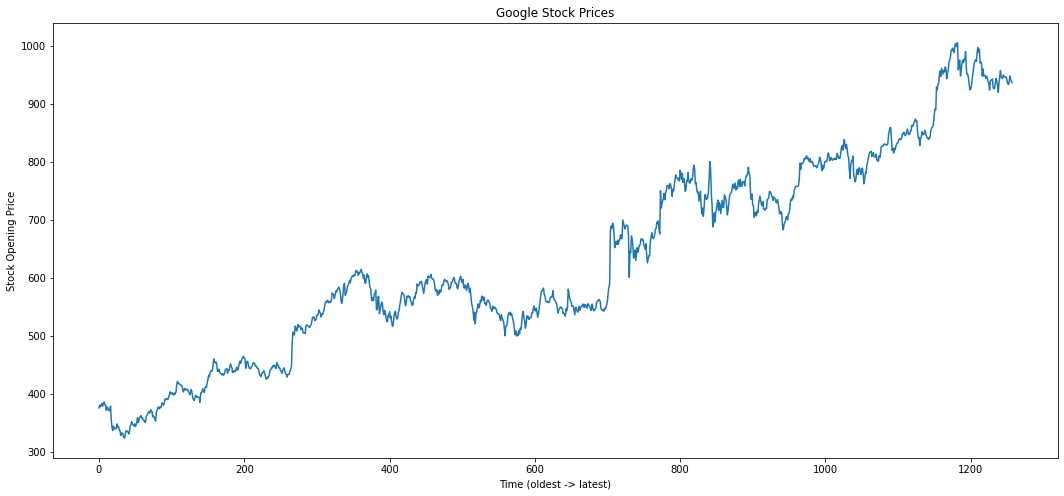

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(train_dataset['Open'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Opening Price")
plt.show()

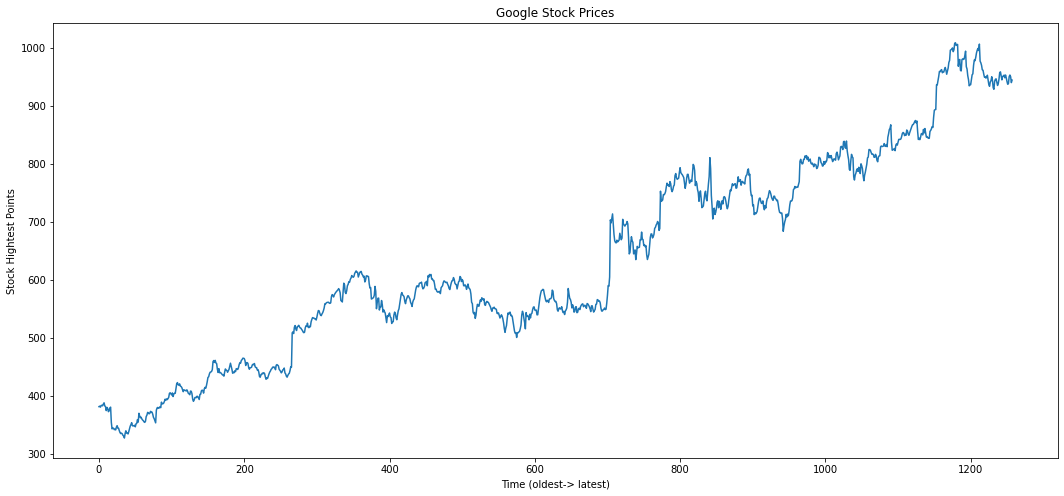

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(train_dataset['High'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest-> latest)")
plt.ylabel("Stock Hightest Points")
plt.show()

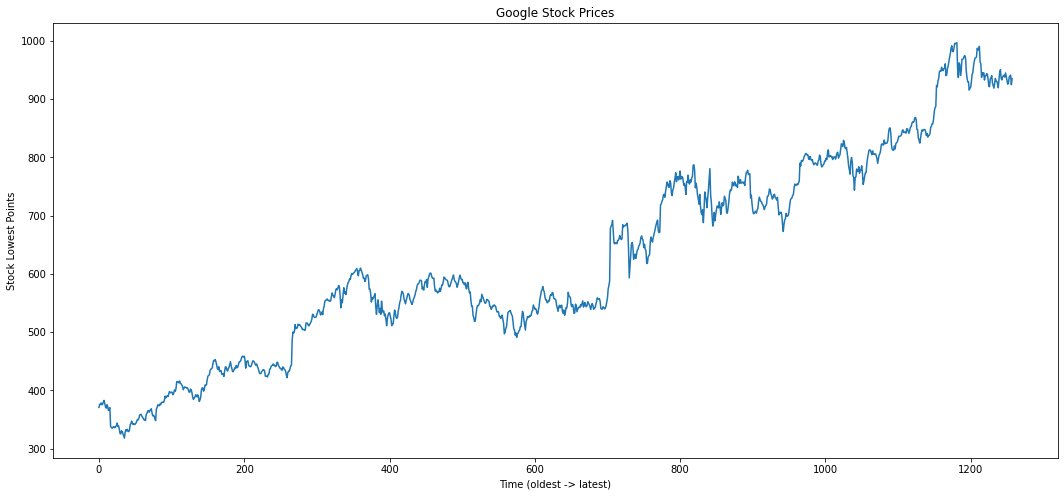

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(train_dataset['Low'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Points")
plt.show()

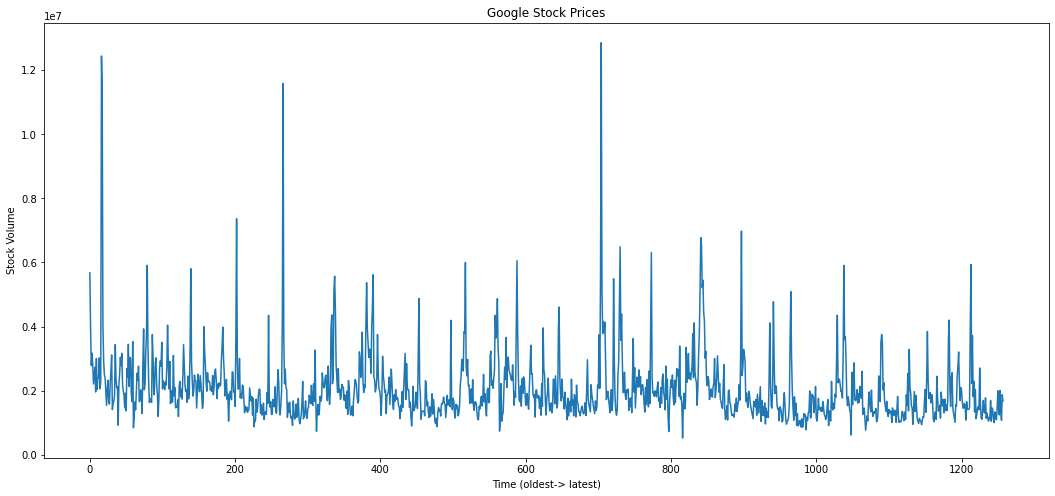

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(train_dataset['Volume'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest-> latest)")
plt.ylabel("Stock Volume")
plt.show()

In [ ]:
input_feature = train_dataset[['Open', 'High', 'Low', 'Volume', 'Close']]
input_data = input_feature.values

In [ ]:
print(input_data.shape)

(1258, 5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data[:,:] = scaler.fit_transform(input_data[:,:])

In [ ]:
input_data

array([[0.07619802, 0.07945378, 0.07747309, 0.41770245, 0.07819275],
       [0.08360086, 0.08062718, 0.08533097, 0.2764961 , 0.08042683],
       [0.07934972, 0.07803104, 0.08496241, 0.18342797, 0.07895704],
       ...,
       [0.90805811, 0.91403385, 0.917765  , 0.04487843, 0.91031351],
       [0.90319129, 0.89899968, 0.89369011, 0.10960805, 0.89711481],
       [0.89914537, 0.9053507 , 0.90933215, 0.09334591, 0.90174464]])

In [ ]:
lookback=50
total_size=len(train_dataset)
X=[]  # list of featrues ....
y=[] # list of output...
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction
    t=[]
    for j in range(0, lookback): # loop for 50 days
        current_index = i+j
        t.append(input_data[current_index, :]) # get data margin from 50 days with marging i
    X.append(t)
    y.append(input_data[lookback+i, 4])

In [ ]:
test_size=100 # 100 days for testing data
X, y= np.array(X), np.array(y)
X_test = X[:test_size]
Y_test = y[:test_size]


X_work = X[test_size:]
y_work = y[test_size:]

validate_size = 10

X_valid = X[:validate_size]
y_valid = y[:validate_size]
X_train = X[validate_size:]
y_train = y[validate_size:]

In [ ]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(X_work.shape)
print(Y_test.shape)
print(y_work.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1208, 50, 5)
(1208,)
(100, 50, 5)
(1108, 50, 5)
(100,)
(1108,)
(10, 50, 5)
(1198,)
(10,)


In [ ]:
print(X_train.shape)

(1198, 50, 5)


In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 5)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - ETA: 0s - loss: 0.0833 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.01160, saving model to model.h5
19/19 [==============================] - 7s 133ms/step - loss: 0.0833 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
19/19 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 8.3472e-04
Epoch 2: val_loss improved from 0.01160 to 0.00912, saving model to model.h5
19/19 [==============================] - 2s 90ms/step - loss: 0.0081 - accuracy: 8.3472e-04 - val_loss: 0.0091 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
19/19 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 8.3472e-04
Epoch 3: val_loss improved from 0.00912 to 0.00213, saving model to model.h5
19/19 [==============================] - 2s 89ms/step - loss: 0.0019 - accuracy: 8.3472e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
19/19 [===

In [ ]:
predicted_value = model.predict(X_test)

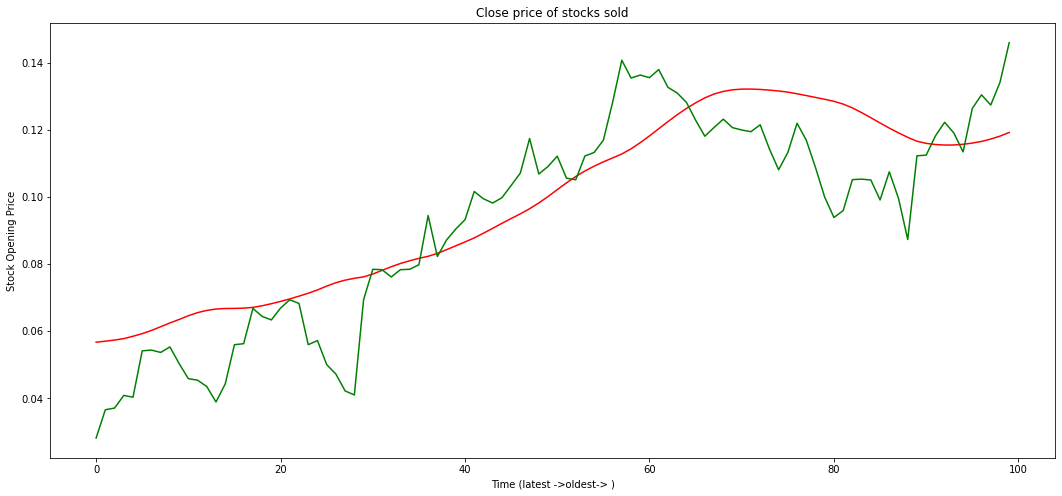

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(predicted_value, color= 'red')
plt.plot(Y_test, color='green')
plt.title("Close price of stocks sold")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,predicted_value)

0.00024382604882910986